# R2.07 TP



## Graph traversal



***
***
The aim of these practical is to implement BFS and DFS.


***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_


**Last cell is the scoring program, which tells you if your code works. A similar program (with more examples and situations) will be used to grade you**

* _your code must compile, otherwise the scoring program will return 0 (or will not execute at all), giving you 0 to the whole practical. The initial code compiles, so there shall be no excuse._
* _feel free to explain why in some situations your algorithm returns the wrong result_


All graph are assumed to be simple (they can be directed or not, except for (strongly) connected components where the choice will be clear)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

## BFS


The aim of this first part is to implement a (simple) version of the breath-firts-search.
We will use queues.
___

Queues can be implemented in python as follows, using the constructors <tt>queue.enqueue(elmt)</tt> and <tt>queue.dequeue</tt>.

In [2]:
class Queue:

    def __init__(self):
        self.queue = []

        
    def __str__(self):
        return "->[" + ", ".join(str(elt) for elt in reversed(self.queue)) + "]->"
    
    
    def enqueue(self, item):
        self.queue.append(item)

    def dequeue(self):
        if len(self.queue) < 1:
            return None
        return self.queue.pop(0)

    def size(self):
        return len(self.queue) 

    

**question 1**

create an empty queue. Enqueue elements 'a', 'b', 'c' then dequeue them. 

In [3]:
queue = Queue()
queue.enqueue("a")
queue.enqueue("b")
queue.enqueue("c")
print(queue)
queue.dequeue()
print(queue)
queue.dequeue()
print(queue)
queue.dequeue()
print(queue)

->[c, b, a]->
->[c, b]->
->[c]->
->[]->


**question 2**

create a function <tt>neighbours</tt> which gives the (out-)neighbours of a vertex <tt>v</tt> in a graph given by its adjacency matrix <tt>A<tt>
    
    
    



In [4]:
def neighbours(A, v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of interger
    """

    neighbours = []
    n = A.shape[0] # ordre du graphe = taille de la matrice carrée

    for j in range(n): # on parcourt les colonnes
        if A[v, j] == 1: # si j est un voisin de v
            neighbours.append(j)

    return neighbours

A = np.array([
    [0,1,0,0,1], 
    [1,0,1,1,0], 
    [0,1,0,0,0], 
    [0,1,0,0,1],
    [1,0,0,1,0]
])

neighbours(A, 1)

[0, 2, 3]

**question 3**


implement BFS for a connected graph


requirement: you'll use the variables
- <tt>queue</tt> : a queue reprensenting the vertices that currently wait to be treated (see BFS pseudo-code in the course)
- <tt>visited</tt> : a list (initially empty) where vertices go after being treated
- <tt>seen</tt> : a list (initially all -1) asserting weither a vertex has been seen in the traversal yet, and if so when (counts starts at 0)

cur 0
visited [0, 0]
file ->[]->
cur 1
visited [0, 0, 1]
file ->[4]->
cur 4
visited [0, 0, 1, 4]
file ->[3, 2]->
cur 2
visited [0, 0, 1, 4, 2]
file ->[3]->


[0, 0, 1, 4, 2]

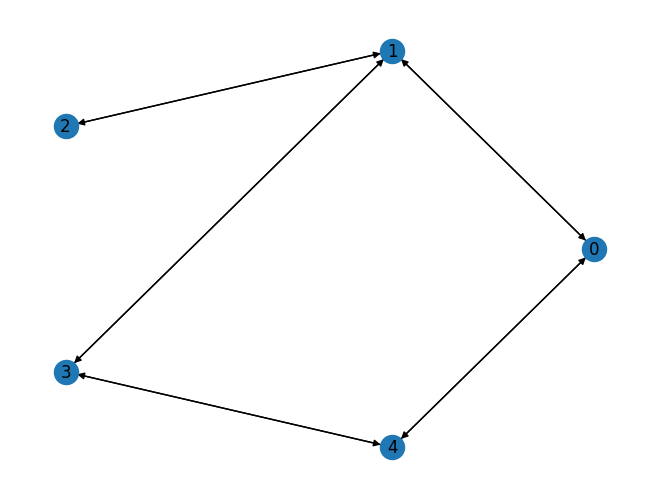

In [10]:
def BFS_simple(A):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[BFS_order,parent]
    :return BFS_order:  the list of vertices in the order they appear in the BFS
    :rtype BFS_order: list of intergers  
    """
            
    #initialisation
    n = A.shape[0]
    queue = Queue()
    visited = []
    seen = [-1] * n

    queue.enqueue(0)
    visited.append(0)
    seen[0] = 0

    while len(visited) < n:
        u = queue.dequeue() # sommet courant
        visited.append(u)
        print("cur", u)
        print("visited", visited)
        print("file", queue)
        neigh = neighbours(A, u) # voisins de u
        for v in neigh:
            if seen[v] == -1:
                queue.enqueue(v)
                seen[v] = 0
    BFS_order = visited
    
    return BFS_order


A = np.array([
    [0,1,0,0,1],
    [1,0,1,1,0],
    [0,1,0,0,0],
    [0,1,0,0,1],
    [1,0,0,1,0]
])

B = np.array([
    [0,1,0,0,0],
    [1,0,1,1,0],
    [0,1,0,0,0],
    [0,1,0,0,0],
    [1,0,0,1,0]
])


M = A

G = nx.from_numpy_array(M, create_using = nx.MultiDiGraph())
nx.draw(G, pos = nx.circular_layout(G), with_labels = True,)
BFS_simple(M)

**question 4**


implement BFS for any graph

*hint* : <tt>use list.index(elt)</tt> on <tt>seen</tt> to get a new unseen vertex.

In [5]:
def BFS_nonconnected(A):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[BFS_order,parent]
    :return BFS_order:  the list of vertices in the order they appear in the BFS
    :rtype BFS_order: list of intergers
    """

    n = A.shape[0]
    queue = Queue()
    visited = []
    seen = [-1] * n
    parent = [-1] * n
    queue.enqueue(0)
    seen[0] = 0

    while len(visited) < n:
        if queue.size != 0: # si la file contient encore des sommets
            u = queue.dequeue() # sommet courant
            visited.append(u)
            print("cur", u)
            print("visited", visited)
            print("file", queue)
            neigh = neighbours(A, u) # voisins de u
            for v in neigh:
                if seen[v] == -1:
                    queue.enqueue(v)
                    seen[v] = 0
        else: #si la file est vide, on prend un sommet non vu
            u = seen.index(-1) # u est un sommet non vu
            queue.enqueue(u)
    BFS_order = visited
   
    return BFS_order



**Bonus question** 

add a array which stores the parent in the BFS tree

[[0, 1, 2, 3, 4], [None, 0, 1, None, None]]

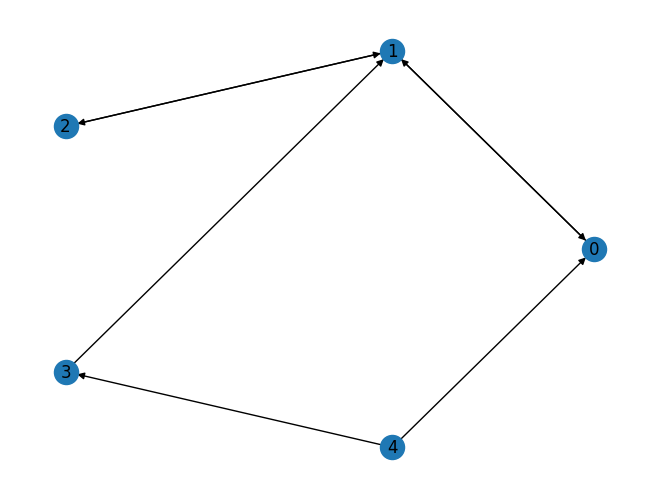

In [7]:
def BFS_tree(A):
    """
    BFS traversal of a graph
    
    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[BFS_order,parent]
    :return BFS_order:  the list of vertices in the order they appear in the BFS
    :rtype BFS_order: list of intergers
    :return parent:  the array of parent of each vertex in the BFS tree
    :rtype parent: array of intergers    
    """

    n = A.shape[0]
    queue = Queue()
    visited = []
    seen = [-1] * n
    parent = [-1] * n

    for i in range(n):
        if i not in visited:
            queue.enqueue(i)
            visited.append(i)
            seen[i] = 0
            parent[i] = None
            while queue.size() > 0:
                v = queue.dequeue()
                for w in neighbours(A, v):
                    if w not in visited:
                        queue.enqueue(w)
                        visited.append(w)
                        seen[w] = seen[v] + 1
                        parent[w] = v
    BFS_order = visited
   
    return [BFS_order, parent]


A = np.array([
    [0,1,0,0,1], 
    [1,0,1,1,0], 
    [0,1,0,0,0], 
    [0,1,0,0,1],
    [1,0,0,1,0]
])

B = np.array([
    [0,1,0,0,1], 
    [1,0,1,0,0], 
    [0,1,0,0,0], 
    [0,1,0,0,0],
    [1,0,0,1,0]
])

C = np.array([
    [0,1,0,0,0], 
    [1,0,1,0,0], 
    [0,1,0,0,0], 
    [0,1,0,0,0],
    [1,0,0,1,0]
])

M=C

G = nx.from_numpy_array(M, create_using = nx.MultiDiGraph())
nx.draw(G, pos = nx.circular_layout(G), with_labels = True,)
BFS_tree(M)      
    

BFS in :
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 1 0]]

 Order :  [0, 1, 2, 3, 4] 
 Tree :  [None, 0, 1, None, None]

cur= 0
j= 1
j hasn't been seen yet
visited= [0]
queue= ->[1]->
cur= 1
j= 0
j= 2
j hasn't been seen yet
visited= [0, 1]
queue= ->[2]->
cur= 2
j= 1
visited= [0, 1, 2]
queue= ->[]->

 empty queue
cur= 3
j= 1
visited= [0, 1, 2, 3]
queue= ->[]->

 empty queue
cur= 4
j= 0
j= 3
visited= [0, 1, 2, 3, 4]
queue= ->[]->


[[0, 1, 2, 3, 4], [-1, 0, 1, -1, -1]]

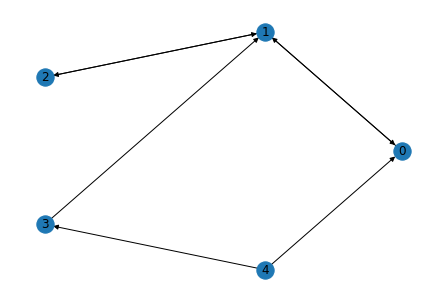


___
___
___

## DFS


The aim of this first part is to implement a (simple) version of the depth-firts-search.


A very natural way to implement DFS is to use *recursivity* (ie calling the function inside the function definition), see exemple below.


The pseudo-code (extracted from *Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein*'s **Introduction to Algorithms**)  for this recursive version of DFS is:



<tt> <b>recursive DFS</b>
    
<b>DFS(A):</b>    
    
    
    for all vertices $u \in S$ do
    
        color[u]= -1
    
        parent[u]= -1

    endfor
    
    date=0    
    
    for all vertices $s \in S$ do
    
        if color[u]==-1 then
        
            DFS_rec(u)    
        fi
    endfor


<b>DFS_rec(u):</b>     
    
    
    color[u]= 0

    date=date+1

    begin[u]=date


    
    for all vertices v $\in$ Neighbours(u) do
    
        if color[v]==-1 then
        
            parent[v]=u
            DFS_rec(v)
        fi
    endfor
    
    date=date+1
    color[u]=1
    end[u]=date



</tt>



We will use this code. Be carefull, some of the inputs are implicit in this pseudo-code, you will have to clean it a bit.


**Question 1**
Take a bit of time to understand how the following function works


In [10]:
###An example of recursive implementation : the factorial function n!


#auxiliary function
def factorial_rec(n):
    return factorial_rec_aux(n,1)

    
#core of the algorithm, recursive function
def factorial_rec_aux(n,m):
    if n==0:
        return m
    else:
        #factorial_rec_aux calls itself
        return factorial_rec_aux(n-1,n*m)
    
print(factorial_rec(23))


25852016738884976640000


**Question 2**
implement a function
<tt>DFS_rec</tt>


First create a function <tt> DFS </tt> which initialise all variables that will be called during the traversal, then calls <tt> DFS_rec </tt>, the actual algorithm, discribed above

In [14]:
def DFS(A):
    """
    (recursive) DFS traversal of a graph
    
    [main function]

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[parent,begin,end]
    :return parent:  the array of parent of each vertex in the DFS tree
    :rtype parent: array of intergers    
    :return begin:  the array of times each vertex are seen for the first time in the traversal
    :rtype begin: array of intergers
    :return end:  the array of times each vertex are seen for the last time in the traversal
    :rtype end: array of intergers        
    """
            
                
    n=A.shape[0]

    color=[-1]*n
    parent=[-1]*n

    begin=[-1]*n
    end=[-1]*n    
    date=0    
    
  
    return [parent,begin,end]





def DFS_rec(A,color,parent,date,begin,end,u):
    """
    (recursive) DFS traversal of a graph
    
    [auxilliary function, actual algoritm]
    
    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param color:  the array of colors of each vertex in the DFS tree
    :type color: array of intergers/strings        
    :param parent:  the array of parent of each vertex in the DFS tree
    :type parent: array of intergers  
    :param date: round in the DFS traversal
    :type date: integer
    :param begin:  the array of times each vertex are seen for the first time in the traversal
    :type begin: array of intergers
    :param end:  the array of times each vertex are seen for the last time in the traversal
    :type end: array of intergers       
    :param u: current vertex
    :type u: integer
    ##
    :return color:  the array of colors of each vertex in the DFS tree
    :rtype color: array of intergers/strings  
    :return:  array[color,parent,date,begin,end]
    :return parent:  the array of parent of each vertex in the DFS tree
    :rtype parent: array of intergers
    :return date: round in the DFS traversal
    :rtype date: integer    
    :return begin:  the array of times each vertex are seen for the first time in the traversal
    :rtype begin: array of intergers
    :return end:  the array of times each vertex are seen for the last time in the traversal
    :rtype end: array of intergers        
    """    
    
    
    color[u]= 0

    date=date+1

    begin[u]=date

 
    return [color,parent,date,begin,end]

A=np.array([[0,1,0,0,0,0,0],[1,0,1,1,0,0,0],[0,1,0,0,1,0,0],[0,1,0,0,0,1,1],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]])

DFS(A)

1
vertex 0
2
vertex 1
3
vertex 2
4
vertex 4
return [[0, 0, 0, -1, 1, -1, -1], [-1, 0, 1, -1, 2, -1, -1], 5, [1, 2, 3, -1, 4, -1, -1], [-1, -1, -1, -1, 4, -1, -1]]
return [[0, 0, 1, -1, 1, -1, -1], [-1, 0, 1, -1, 2, -1, -1], 6, [1, 2, 3, -1, 4, -1, -1], [-1, -1, 5, -1, 4, -1, -1]]
7
vertex 3
8
vertex 5
return [[0, 0, 1, 0, 1, 1, -1], [-1, 0, 1, 1, 2, 3, -1], 9, [1, 2, 3, 7, 4, 8, -1], [-1, -1, 5, -1, 4, 8, -1]]
10
vertex 6
return [[0, 0, 1, 0, 1, 1, 1], [-1, 0, 1, 1, 2, 3, 3], 11, [1, 2, 3, 7, 4, 8, 10], [-1, -1, 5, -1, 4, 8, 10]]
return [[0, 0, 1, 1, 1, 1, 1], [-1, 0, 1, 1, 2, 3, 3], 12, [1, 2, 3, 7, 4, 8, 10], [-1, -1, 5, 11, 4, 8, 10]]
return [[0, 1, 1, 1, 1, 1, 1], [-1, 0, 1, 1, 2, 3, 3], 13, [1, 2, 3, 7, 4, 8, 10], [-1, 12, 5, 11, 4, 8, 10]]
return [[1, 1, 1, 1, 1, 1, 1], [-1, 0, 1, 1, 2, 3, 3], 14, [1, 2, 3, 7, 4, 8, 10], [13, 12, 5, 11, 4, 8, 10]]


[[-1, 0, 1, 1, 2, 3, 3], [1, 2, 3, 7, 4, 8, 10], [13, 12, 5, 11, 4, 8, 10]]

**Question 3**

using le arrays <tt>begin</tt> and <tt>end</tt>, give the prefix and postfix orders of the graph.

## Bonus



Implement DFS using stacks.
___

stacks can be implemented in python as follow, using the constructors <tt>stack.push(elmt)</tt> and <tt>stack.pop</tt>.

**bonus question 1**

create an empty stack. Push  elements 'a', 'b', 'c' then pop them.

In [56]:
# A simple class stack that only allows pop and push operations
class Stack:

    def __init__(self):
        self.stack = []

    def __str__(self):
        return " î \n"+"|\n".join("|"+str(elt) for elt in reversed(self.stack))+"|"        
        
    def pop(self):
        if len(self.stack) < 1:
            return None
        return self.stack.pop()

    def push(self, item):
        self.stack.append(item)

    def size(self):
        return len(self.stack)

In [57]:
stack=Stack()

stack.push("a")
stack.push("b")
stack.push("c")
print(stack)

 î 
|c|
|b|
|a|


**bonus question 2**
implement DFS using stacks (without recursion)

cur= 0
j= 4
j hasn't been seen yet
j= 3
j hasn't been seen yet
j= 2
j hasn't been seen yet
j= 1
j hasn't been seen yet
visited= [0]
stack=
  î 
|1|
|2|
|3|
|4|
cur= 1
visited= [0, 1]
stack=
  î 
|2|
|3|
|4|
cur= 2
j= 6
j hasn't been seen yet
j= 4
j hasn't been seen yet
j= 1
visited= [0, 1, 2]
stack=
  î 
|4|
|6|
|3|
|4|
cur= 4
j= 5
j hasn't been seen yet
j= 0
visited= [0, 1, 2, 4]
stack=
  î 
|5|
|6|
|3|
|4|
cur= 5
visited= [0, 1, 2, 4, 5]
stack=
  î 
|6|
|3|
|4|
cur= 6
j= 7
j hasn't been seen yet
j= 4
visited= [0, 1, 2, 4, 5, 6]
stack=
  î 
|7|
|3|
|4|
cur= 7
visited= [0, 1, 2, 4, 5, 6, 7]
stack=
  î 
|3|
|4|
cur= 3
j= 7
j= 4
visited= [0, 1, 2, 4, 5, 6, 7, 3]
stack=
  î 
|4|


[[0, 1, 2, 4, 5, 6, 7, 3], [1, 2, 3, 8, 4, 5, 6, 7]]

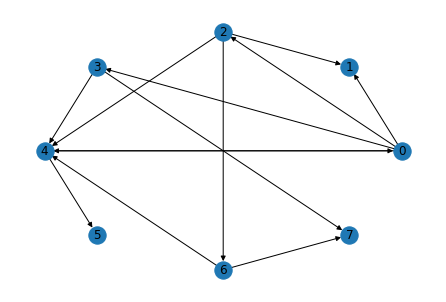

In [58]:
##todo

def DFS_stack(A):
    """
    (non-recursive, stack-based) DFS traversal of a graph
    
    [main function]
    
    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :return:  array[parent,begin,end]
    :return parent:  the array of parent of each vertex in the DFS tree
    :rtype parent: array of intergers    
    :return begin:  the array of times each vertex are seen for the first time in the traversal
    :rtype begin: array of intergers
    :return end:  the array of times each vertex are seen for the last time in the traversal
    :rtype end: array of intergers        
    """
                
    n=A.shape[0]
    
    stack=Stack()
    visited_prefix=[]
    visited_postfix=[]
    seen=[-1]*n

    return [visited_prefix,seen]   

A=np.array(
[[0,1,1,1,1,0,1,0],
 [1,0,1,0,0,0,0,0],
 [1,1,0,0,1,0,1,0],
 [1,0,0,0,1,0,0,1],
 [1,0,1,1,0,1,1,0],
 [0,0,0,0,1,0,0,1],
 [1,0,1,0,1,0,0,1],
 [0,0,0,1,0,1,1,0]])

#nx.draw(nx.from_numpy_array(A),with_labels =True)



B=np.array(
[[0,1,1,1,1,0,0,0],
 [0,0,0,0,0,0,0,0],
 [0,1,0,0,1,0,1,0],
 [0,0,0,0,1,0,0,1],
 [1,0,0,0,0,1,0,0],
 [0,0,0,0,0,0,0,0],
 [0,0,0,0,1,0,0,1],
 [0,0,0,0,0,0,0,0]])

G=nx.from_numpy_array(B,create_using=nx.MultiDiGraph())
nx.draw(G,pos=nx.circular_layout(G),with_labels =True,)

DFS_stack(B)

**bonus question 3**
Add the prefix and suffix order to your previous function

---
---
# Scoring program

**do not modify**


In [59]:
#undirected

A=np.array(
[[0,1,0,0,1], 
[1,0,1,1,0], 
[0,1,0,0,0], 
[0,1,0,0,1],
[1,0,0,1,0]])


#directed

B=np.array(
[[0,1,0,0,1], 
[1,0,1,0,0], 
[0,1,0,0,0], 
[0,1,0,0,0],
[1,0,0,1,0]])

#directed not strongly connected

C=np.array(
[[0,1,0,0,0], 
[1,0,1,0,0], 
[0,1,0,0,0], 
[0,1,0,0,0],
[1,0,0,1,0]])




score=0

score_BFS=0

print(neighbours(B,0))
#### BFS
if np.array_equal(neighbours(A,0),[1,4]):
    score_BFS=score_BFS+1
    print("Neighbours(A) : ok")
else :
    print("Neighbours(A) : fail")
if np.array_equal(neighbours(B,3),[1]):
    score_BFS=score_BFS+1
    print("Neighbours(B) : ok")
else :
    print("Neighbours(B) : fail")    

    
if np.array_equal(BFS_simple(A),[0, 1, 4, 2, 3]):
    score_BFS=score_BFS+1
    print("BFS(A) : ok")
else :
    print("BFS(A) : fail")     
    
if np.array_equal(BFS_simple(B),[0, 1, 4, 2, 3]):
    score_BFS=score_BFS+1
    print("BFS(B) : ok")
else :
    print("BFS(B) : fail")    

    
if np.array_equal(BFS_nonconnected(C),[0, 1, 2, 3, 4]):
    score_BFS=score_BFS+1
    print("BFS(C) : ok")
else :
    print("BFS(C) : fail")    
    
    
 
print("\n ***\n your score for BFS is: ", score_BFS,"/5 \n ***\n ")
    
score=score+score_BFS


[1, 4]
Neighbours(A) : ok
Neighbours(B) : ok
cur= 0
j= 1
j hasn't been seen yet
j= 4
j hasn't been seen yet
visited= [0]
queue= ->[4, 1]->
cur= 1
j= 0
j= 2
j hasn't been seen yet
j= 3
j hasn't been seen yet
visited= [0, 1]
queue= ->[3, 2, 4]->
cur= 4
j= 0
j= 3
visited= [0, 1, 4]
queue= ->[3, 2]->
cur= 2
j= 1
visited= [0, 1, 4, 2]
queue= ->[3]->
cur= 3
j= 1
j= 4
visited= [0, 1, 4, 2, 3]
queue= ->[]->
BFS(A) : ok
cur= 0
j= 1
j hasn't been seen yet
j= 4
j hasn't been seen yet
visited= [0]
queue= ->[4, 1]->
cur= 1
j= 0
j= 2
j hasn't been seen yet
visited= [0, 1]
queue= ->[2, 4]->
cur= 4
j= 0
j= 3
j hasn't been seen yet
visited= [0, 1, 4]
queue= ->[3, 2]->
cur= 2
j= 1
visited= [0, 1, 4, 2]
queue= ->[3]->
cur= 3
j= 1
visited= [0, 1, 4, 2, 3]
queue= ->[]->
BFS(B) : ok
cur= 0
j= 1
j hasn't been seen yet
visited= [0]
queue= ->[1]->
cur= 1
j= 0
j= 2
j hasn't been seen yet
visited= [0, 1]
queue= ->[2]->
cur= 2
j= 1
visited= [0, 1, 2]
queue= ->[]->
cur= 3
j= 1
visited= [0, 1, 2, 3]
queue= ->[]->
c